![Alt text: Slogan da Meteora.](https://i.imgur.com/VDYh2G1.png)

# 1. Estruturando a tabela

**Meteora** é uma loja que vende roupas e acessórios de diversas marcas por todos os estados do Brasil, para entender suas bases de dados e exibir informações relevantes com o objetivo de auxiliar suas tomadas de decisão.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

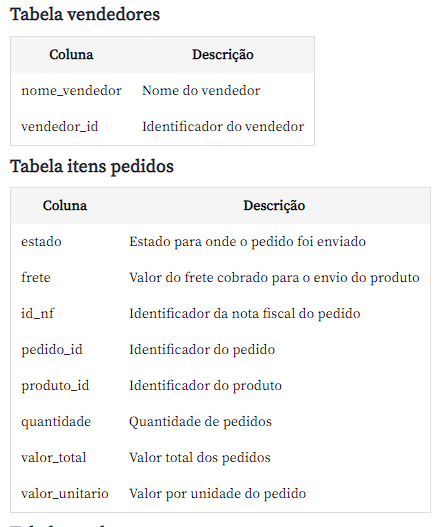 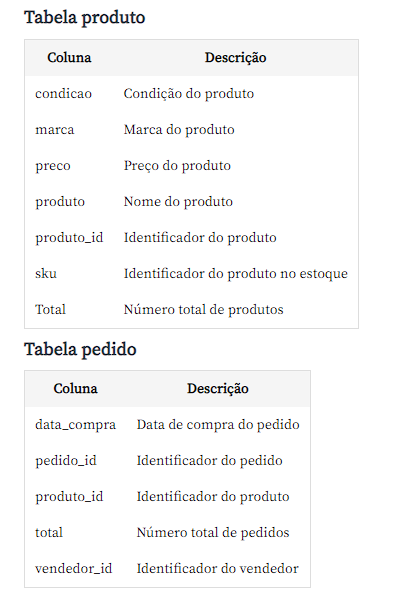

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [56]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [57]:
itens_pedidos  = pd.read_csv(url_itens_pedidos)         
pedidos        = pd.read_csv(url_pedidos) 
produtos        = pd.read_csv(url_produto) 
vendedores     = pd.read_csv(url_vendedores)         

In [58]:
engine = create_engine('sqlite:///:memory:')

In [59]:
produtos.to_sql('tb_produtos',engine,index = False)

205

In [60]:
itens_pedidos.to_sql('tb_itens_pedidos',engine,index = False)
pedidos.to_sql('tb_pedidos',engine,index = False)
vendedores.to_sql('tb_vendedores',engine,index = False)

5

In [61]:
inspetor = inspect(engine)
print(inspetor.get_table_names())

['tb_itens_pedidos', 'tb_pedidos', 'tb_produtos', 'tb_vendedores']


# 2. Primeiras consultas

Vamos entender a característica do produto que é comercializadora na Meteora, analisando a **condição** dos produtos vendidos.

In [62]:
query = 'SELECT * FROM tb_produtos'

In [63]:
def sql(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        dados = consulta.fetchall()
    return pd.DataFrame(dados, columns= consulta.keys())

In [64]:
sql(query)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


In [65]:
query = '''SELECT CONDICAO, COUNT(*) as Quantidade 
           FROM tb_Produtos 
           GROUP BY CONDICAO;'''

In [66]:
df_produtos = sql(query)

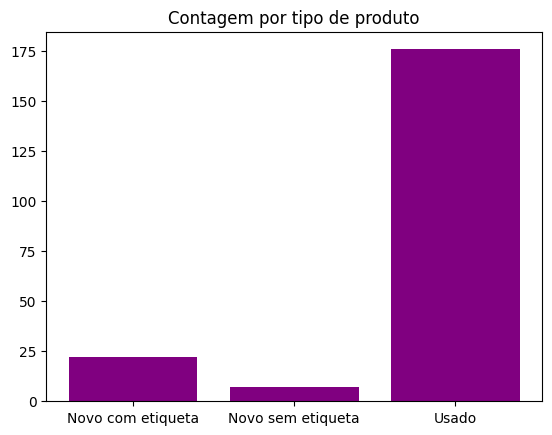

In [67]:
plt.bar(df_produtos['Condicao'],df_produtos['Quantidade'], color = 'purple')
plt.title('Contagem por tipo de produto')
plt.show()

Agora precisamos ranquear os produtos que mais foram pedidos por **quantidade** para entender a necessidade de um estoque de produtos na loja.

In [68]:
sql('SELECT * FROM TB_PRODUTOS').head(10)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
5,51238,Mala Bolsos Preta,410,Gap,286008,Usado
6,21429,Casaco Preto Botoes,390,Banana Republic,321380,Usado
7,44207,Calca Estampa Pb,290,Fyi,294021,Usado
8,79551,Shorts Jeans Destroyed,290,Sacada,213739,Usado
9,6262,Camiseta Eternity,644,Mixed,247015,Novo com etiqueta


In [69]:
sql('SELECT * FROM TB_ITENS_PEDIDOS').head(10)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
5,6,72621,2980,3,179,537,BR-MG,107.4
6,7,86243,3443,4,350,1400,BR-PR,280.0
7,8,29012,3557,5,525,2625,BR-MS,525.0
8,9,61071,3585,3,450,1350,BR-SP,270.0
9,10,100961,3687,2,480,960,BR-GO,192.0


In [70]:
query = '''SELECT TB_PRODUTOS.PRODUTO, SUM(TB_ITENS_PEDIDOS.QUANTIDADE) AS Quantidade
FROM TB_ITENS_PEDIDOS, TB_PRODUTOS
WHERE TB_ITENS_PEDIDOS.PRODUTO_ID = TB_PRODUTOS.PRODUTO_ID
GROUP BY TB_PRODUTOS.PRODUTO
ORDER BY Quantidade DESC
'''

sql(query)


,produto,Quantidade
0,Vestido Recortes Cores,795
1,Calca Jeans Costuras,755
2,Saia Pregas Preta,751
3,Calca Alfaiataria Preta,750
4,Saia Midi Cinto,549
...,...,...
196,Blusa Cinza,341
197,Blusa Babados Off-white,337
198,Blusa Malha Azul,325
199,Blusa Listrada Malha,322


In [71]:
query = '''SELECT TB_PRODUTOS.PRODUTO, SUM(TB_ITENS_PEDIDOS.QUANTIDADE) AS Quantidade
FROM TB_PRODUTOS
LEFT JOIN TB_ITENS_PEDIDOS
ON TB_ITENS_PEDIDOS.PRODUTO_ID = TB_PRODUTOS.PRODUTO_ID
GROUP BY TB_PRODUTOS.PRODUTO
ORDER BY Quantidade DESC
--LIMIT 10 OFFSET 10;
'''

sql(query)


,produto,Quantidade
0,Vestido Recortes Cores,795
1,Calca Jeans Costuras,755
2,Saia Pregas Preta,751
3,Calca Alfaiataria Preta,750
4,Saia Midi Cinto,549
...,...,...
196,Blusa Cinza,341
197,Blusa Babados Off-white,337
198,Blusa Malha Azul,325
199,Blusa Listrada Malha,322


In [72]:
query = '''SELECT TB_PRODUTOS.PRODUTO, SUM(TB_ITENS_PEDIDOS.QUANTIDADE) AS Quantidade
FROM TB_PRODUTOS
LEFT JOIN TB_ITENS_PEDIDOS
ON TB_ITENS_PEDIDOS.PRODUTO_ID = TB_PRODUTOS.PRODUTO_ID
GROUP BY TB_PRODUTOS.PRODUTO
ORDER BY Quantidade DESC
LIMIT 10
'''

df_quantidade = sql(query)


In [73]:
df_quantidade.sort_values('Quantidade',inplace = True)

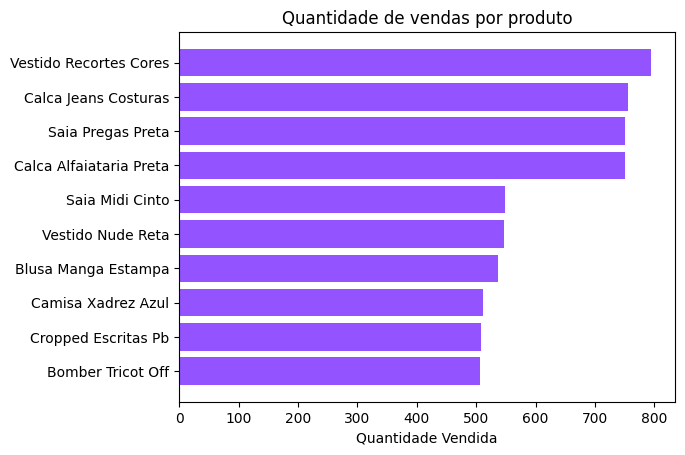

In [74]:
plt.barh(df_quantidade['produto'], df_quantidade['Quantidade'], color = '#9353FF',)
plt.title('Quantidade de vendas por produto')
plt.xlabel('Quantidade Vendida')
plt.show()

# 3. Lidando com filtro

Vamos iniciar uma análise de desempenho do **time de vendedores** da Meteora. A intenção aqui é entender como se deram as vendas dos vendedores no **ano anterior** para que possam ser aplicadas promoções e bônus salarial para a equipe no ano atual da tabela que é 2021

In [75]:
query = 'SELECT * FROM TB_PEDIDOS'

sql(query)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [76]:
sql(query).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


Para entender o desempenho de vendas dos vendedores no ano de 2020, é preciso trabalhar com os dados que estão presentes apenas no ano de 2020.

In [77]:
query = ''' SELECT a.vendedor_id, b.nome_vendedor, count(a.vendedor_id) as QtdeVendas, sum(a.total) as ValorVendido, round(avg(a.total),2) as MedVendas
            FROM TB_PEDIDOS as a
            LEFT JOIN tb_vendedores as b
            ON b.vendedor_id = a.vendedor_id
            WHERE strftime('%Y',a.data_compra) = '2020'
            group by a.vendedor_id, b.nome_vendedor
            order by QtdeVendas desc;
'''
sql(query)

,vendedor_id,nome_vendedor,QtdeVendas,ValorVendido,MedVendas
0,1,Ana Duarte,3427,6317512,1843.45
1,2,Daniel Siqueira,3338,6583666,1972.34
2,3,Nadia Oliveira,2782,5058628,1818.34
3,4,Millena Pereira,2510,4755482,1894.61
4,5,Paulo Calanca,2488,4511913,1813.47


In [78]:
df_pedidos = pedidos[pedidos['data_compra'].str.startswith('2020')]

df_vendas = df_pedidos.merge(vendedores, on='vendedor_id')

df_vendas = df_vendas.groupby('nome_vendedor')['total'].mean().reset_index()

df_2020 = df_vendas.sort_values('total', ascending= False).reset_index(drop= True)

df_2020.columns = ['nome_vendedor','valor_medio_vendas']

df_2020['valor_medio_vendas'] = df_2020['valor_medio_vendas'].round(2)

df_2020


,nome_vendedor,valor_medio_vendas
0,Daniel Siqueira,1972.34
1,Millena Pereira,1894.61
2,Ana Duarte,1843.45
3,Nadia Oliveira,1818.34
4,Paulo Calanca,1813.47


# 4. Avançando nas relações

A Meteora agora deseja incrementar as suas vendas no **estado de São Paulo (SP)**, por acreditar ser uma região mais propícia às vendas já que tem uma boa concentração de pessoas e mercado também.

Mas será que São Paulo já não rende muitas vendas em relação a outros estados?

Uma das ações que a Meteora pretende seguir para as vendas em SP é escolher dois de seus vendedores para que eles **foquem suas vendas** lá. Para essa escolha é interessante ter os profissionais que **mais tenham vendido** para as pessoas da região.